**Project:** Credit Card Fraud Detection

**Project type:** Classification Problem

**About Dataset:** Source(Keggle),Highly Balanced key-feature (Location_Distance,Is_International)


**Tools:** Python,SkLearn,Tenserflow


**Classical Ml Models:**  LogisticRegression,RandomForestClassifier,GradientBoostingClassifier,SVM,KNeighborsClassifier(KNN)

**Note:** In last image is added of models accuracy with and without key-features

In [97]:
#importing  useful libraries Like Pandas,Matplotlib,Seaborn,SkLearn,
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score


In [2]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [111]:
#Loading and inspecting Datset
df=pd.read_csv('data.csv')
print(df.head())
print(df.describe())
print(df.info())

   Hour_of_Day       Amount        V1        V2        V3        V4        V5  \
0            0   674.665643  1.474912 -6.108959 -0.239825  1.200873 -0.629950   
1            0  1108.182213 -0.382658 -1.216533 -1.266718  0.844957  1.149208   
2           21   142.579861 -1.138985 -1.164763 -2.385009  3.121024 -0.138186   
3            3   408.698324  1.579265 -1.973513  0.797570 -0.162698  1.382966   
4            1   863.009479 -1.428044 -0.513303 -2.519929  2.535297  1.579816   

  Merchant_Type  Location_Distance  Transaction_Frequency  Is_International  \
0   Electronics         482.796897                      9                 1   
1        Online          90.225253                      8                 0   
2        Travel          10.103569                      8                 1   
3        Online          85.298194                      6                 1   
4   Electronics          12.075777                     11                 1   

  Device_Type  Class  
0      Mobile  

In [112]:
#Preprocessing Data
# 1- Doing one-hot-Encoding of both categories column
print(df['Merchant_Type'].unique())
print(df['Device_Type'].unique())
df=pd.get_dummies(df,columns=['Merchant_Type'])
df=pd.get_dummies(df,columns=['Device_Type'])
df[['Merchant_Type_Electronics','Merchant_Type_Food','Merchant_Type_Online','Merchant_Type_Retail','Merchant_Type_Travel','Device_Type_Desktop','Device_Type_Mobile','Device_Type_POS']]=df[['Merchant_Type_Electronics','Merchant_Type_Food','Merchant_Type_Online','Merchant_Type_Retail','Merchant_Type_Travel','Device_Type_Desktop','Device_Type_Mobile','Device_Type_POS']].astype(int)
# 2- Renaming Target column
df=df.rename(columns={'Class':'Fraud_non_Fraud'})
df.describe()
print(df["Fraud_non_Fraud"].value_counts())# Note:As you can see that Dataset in balanced


['Electronics' 'Online' 'Travel' 'Retail' 'Food']
['Mobile' 'Desktop' 'POS']


,Hour_of_Day,Amount,V1,V2,V3,V4,V5,Location_Distance,Transaction_Frequency,Is_International,Fraud_non_Fraud,Merchant_Type_Electronics,Merchant_Type_Food,Merchant_Type_Online,Merchant_Type_Retail,Merchant_Type_Travel,Device_Type_Desktop,Device_Type_Mobile,Device_Type_POS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,8.637200,430.279934,-0.000974,-1.269930,-0.739213,0.992748,0.021482,75.088714,4.507200,0.394800,0.500000,0.201200,0.104500,0.344900,0.095700,0.25370,0.272000,0.563900,0.164100
std,7.300925,953.929432,1.317166,1.747545,1.298187,1.581888,1.327787,121.597679,4.103758,0.488832,0.500025,0.400917,0.305923,0.475359,0.294194,0.43515,0.445012,0.495925,0.370385
min,0.000000,1.694434,-6.815103,-8.530760,-5.128894,-3.451673,-7.154941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,64.787754,-0.782728,-2.521676,-1.636546,-0.157609,-0.782416,6.568690,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,6.000000,140.747679,0.006936,-1.085993,-0.677886,0.840659,0.023789,21.953892,3.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,15.000000,422.007157,0.775203,0.063259,0.193460,2.047808,0.820154,90.508796,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000
max,23.000000,33026.177290,7.014630,3.602415,3.536532,6.963319,8.614891,1434.558418,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


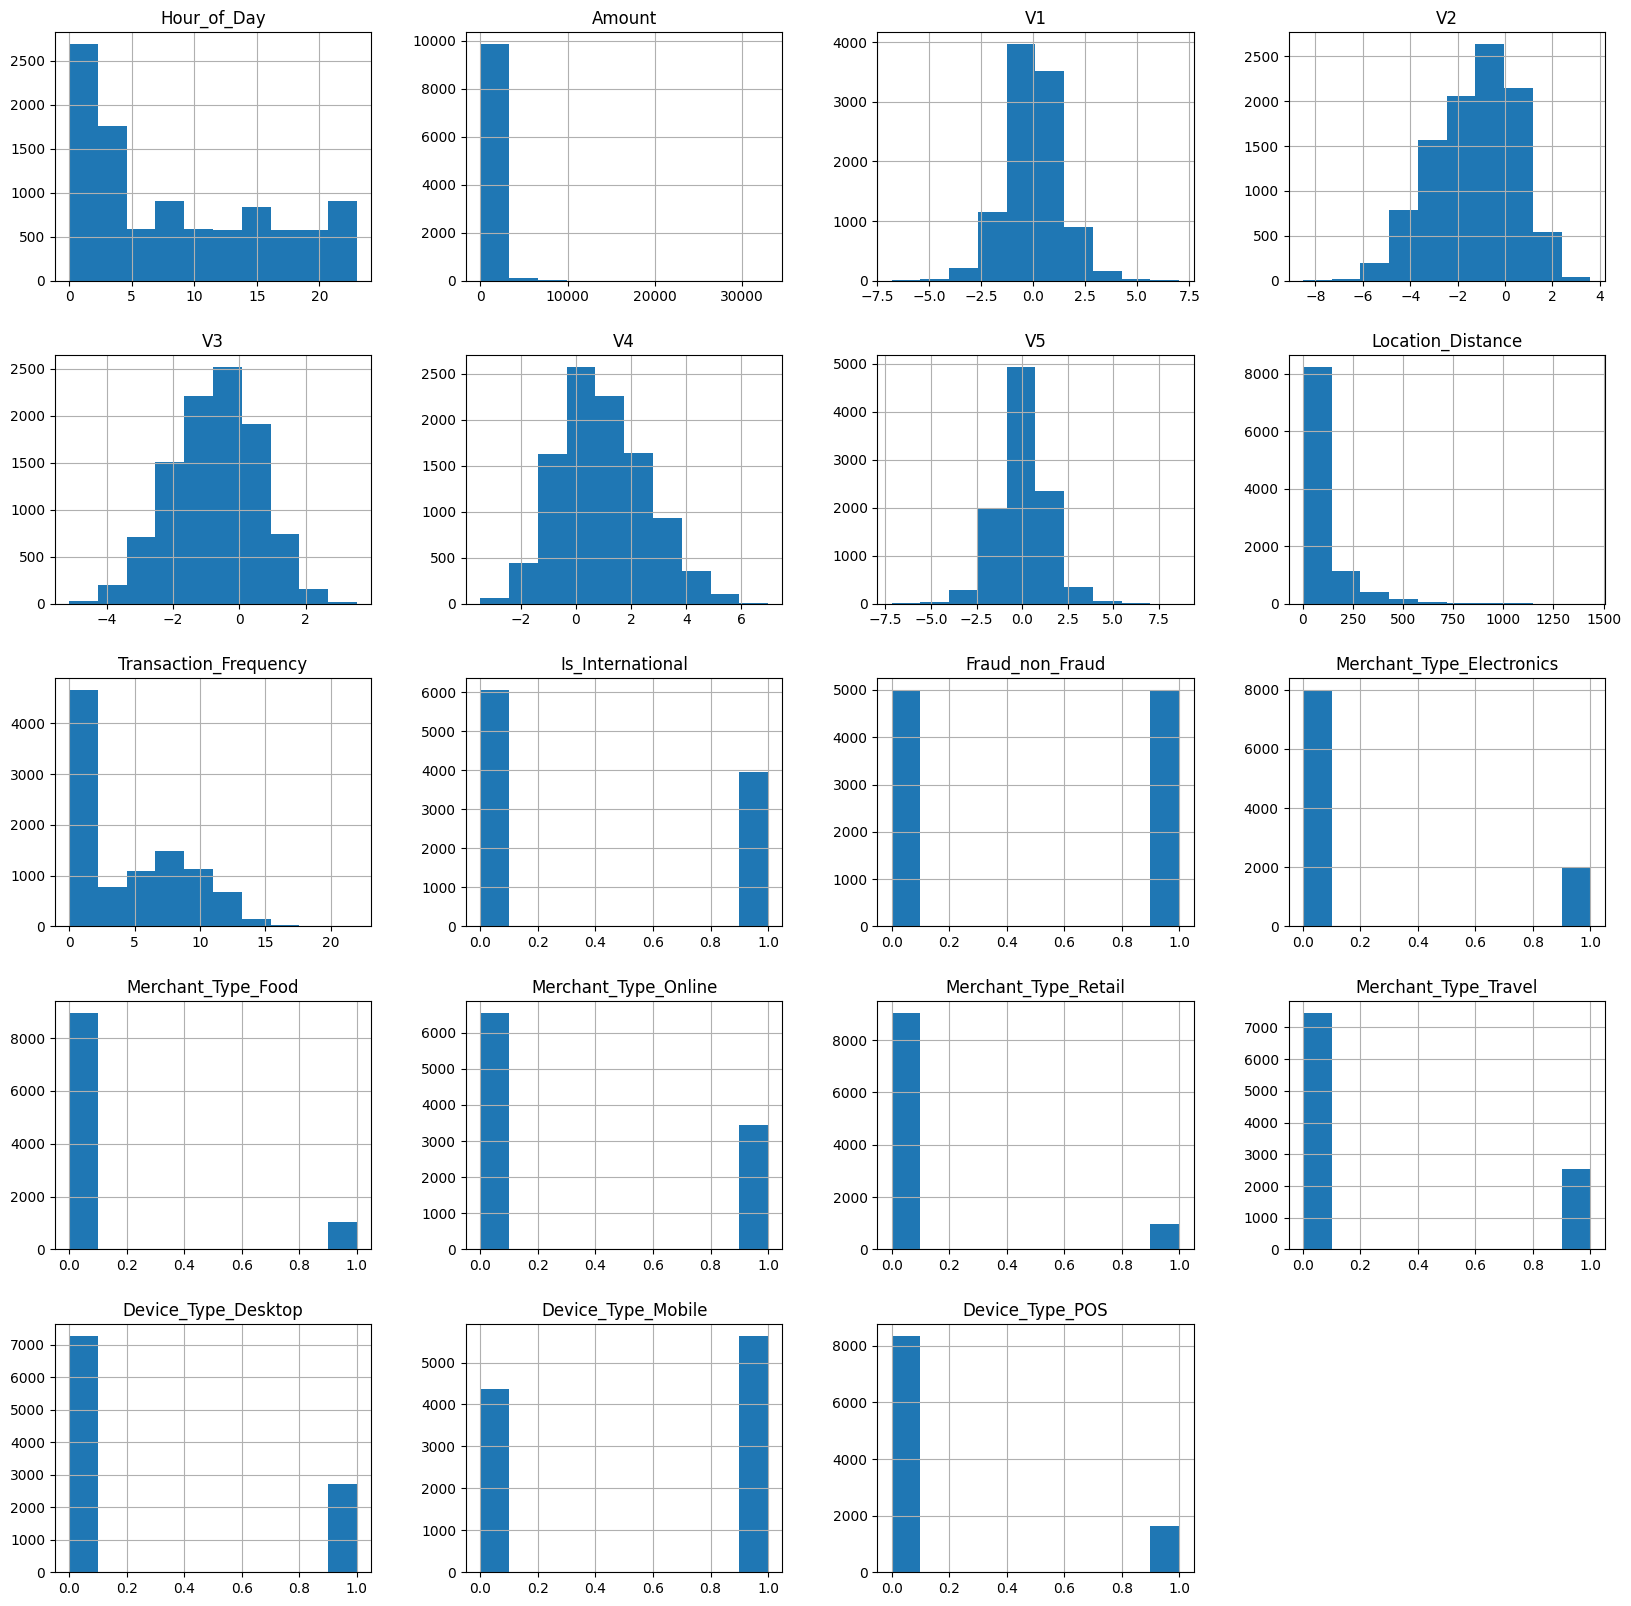

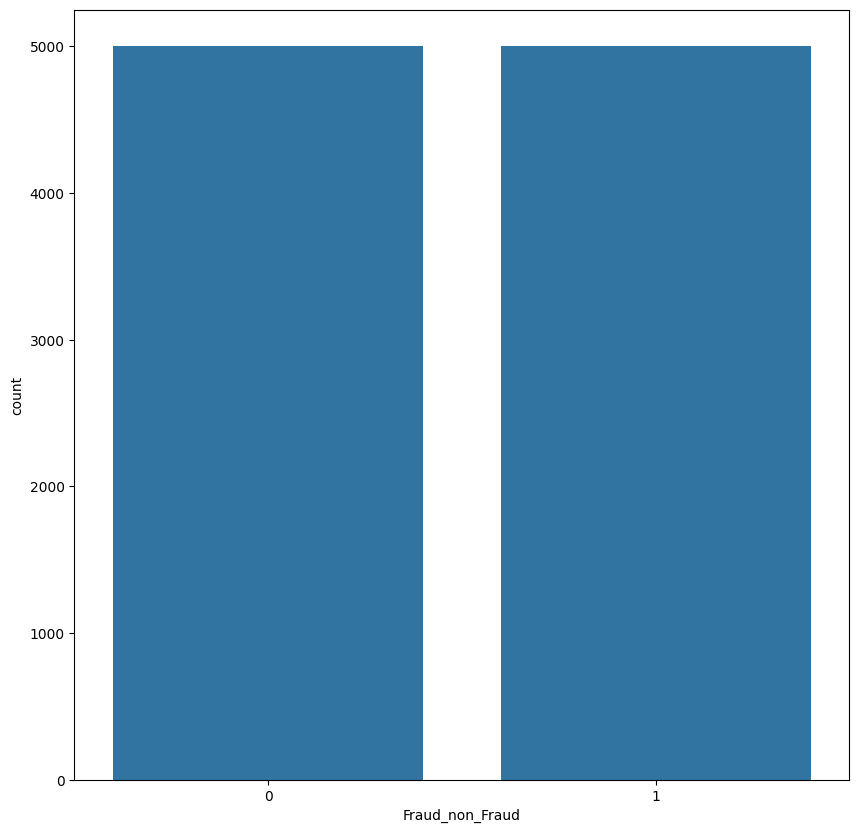

In [113]:
# Exploratory visualization
df.hist(figsize=(20,20))
plt.figure(figsize=(10,10))
sns.countplot(x='Fraud_non_Fraud',data=df)
plt.show()

In [115]:
# Preparing for Training
x=df[['Hour_of_Day','Amount','V1','V2','V3','V4','V5','Location_Distance','Is_International','Transaction_Frequency','Merchant_Type_Electronics','Merchant_Type_Food','Merchant_Type_Online','Merchant_Type_Retail','Merchant_Type_Travel','Device_Type_Desktop','Device_Type_Mobile','Device_Type_POS']]
y=df[['Fraud_non_Fraud']]
x=pd.DataFrame(x)
y=pd.DataFrame(y)
x.head()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
# Scaling Features
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [130]:
# Logistic Regreesion Training
lg_model=LogisticRegression(max_iter=1000)
lg_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [126]:
# Logistic Model Results
y_pred=lg_model.predict(x_test)
score_lg=accuracy_score(y_test,y_pred)
print("Model accuracy \n:",score_lg*100)
print(classification_report(y_test,y_pred))
print("\n\n Confusion Matrix : \n",confusion_matrix(y_pred,y_test))

Model accuracy 
: 99.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



 Confusion Matrix : 
 [[1000    1]
 [   0  999]]


In [131]:
# Random Forest Training
tree=RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
tree.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=42)

In [132]:
# Random Forest Result
rf_predict=tree.predict(x_test)
score_rf=accuracy_score(y_test,rf_predict)
print('SVM accuracy \n',score_rf*100)
print(classification_report(y_test,rf_predict))
print("\n\n Confusion Matrix : \n",confusion_matrix(rf_predict,y_test))

99.75
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



 Confusion Matrix : 
 [[998   3]
 [  2 997]]


In [133]:
#  KNN training
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [139]:
# KNN results
KNN_predict=KNN_model.predict(x_test)
score_knn=accuracy_score(y_test,KNN_predict)
print('KNN accuracy \n',score_knn*100)
print(classification_report(y_test,KNN_predict))
print("\n\n Confusion Matrix : \n",confusion_matrix(KNN_predict,y_test))


KNN accuracy 
 99.65
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



 Confusion Matrix : 
 [[999   6]
 [  1 994]]


In [135]:
# SVC Training
svm_model=SVC(kernel='rbf',probability=True,random_state=42)
svm_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

In [138]:
# SVM results
svm_pred=svm_model.predict(x_test)
score_svm=accuracy_score(y_test,svm_pred)
print('SVM accuracy \n',score_svm*100)
print(classification_report(y_test,svm_pred))
print("\n\n Confusion Matrix : \n",confusion_matrix(svm_pred,y_test))


SVM accuracy 
 99.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



 Confusion Matrix : 
 [[1000    1]
 [   0  999]]


In [144]:
# Importing Tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# Neural network model
model=Sequential([
    Dense(64,activation='sigmoid',input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(32,activation='sigmoid'),
    Dense(1,activation='sigmoid')
])
# Training Sequential Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.2,epochs=25,batch_size=32)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8684 - loss: 0.2991 - val_accuracy: 0.9981 - val_loss: 0.0874
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9893 - loss: 0.0423 - val_accuracy: 0.9981 - val_loss: 0.0170
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9937 - loss: 0.0281 - val_accuracy: 0.9994 - val_loss: 0.0096
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.9994 - val_loss: 0.0077
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9994 - val_loss: 0.0063
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9925 - loss: 0.0256 - val_accuracy: 0.9994 - val_loss: 0.0057
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9893 - loss: 0.0302 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9934 - loss: 0.0225 - val_accuracy: 0.

In [145]:
# Model Results
y_prob=model.predict(x_test)
y_pred_labels = (y_prob > 0.5).astype(int).reshape(-1)
print(accuracy_score(y_test, y_pred_labels)*100)
print(classification_report(y_test, y_pred_labels))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
99.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



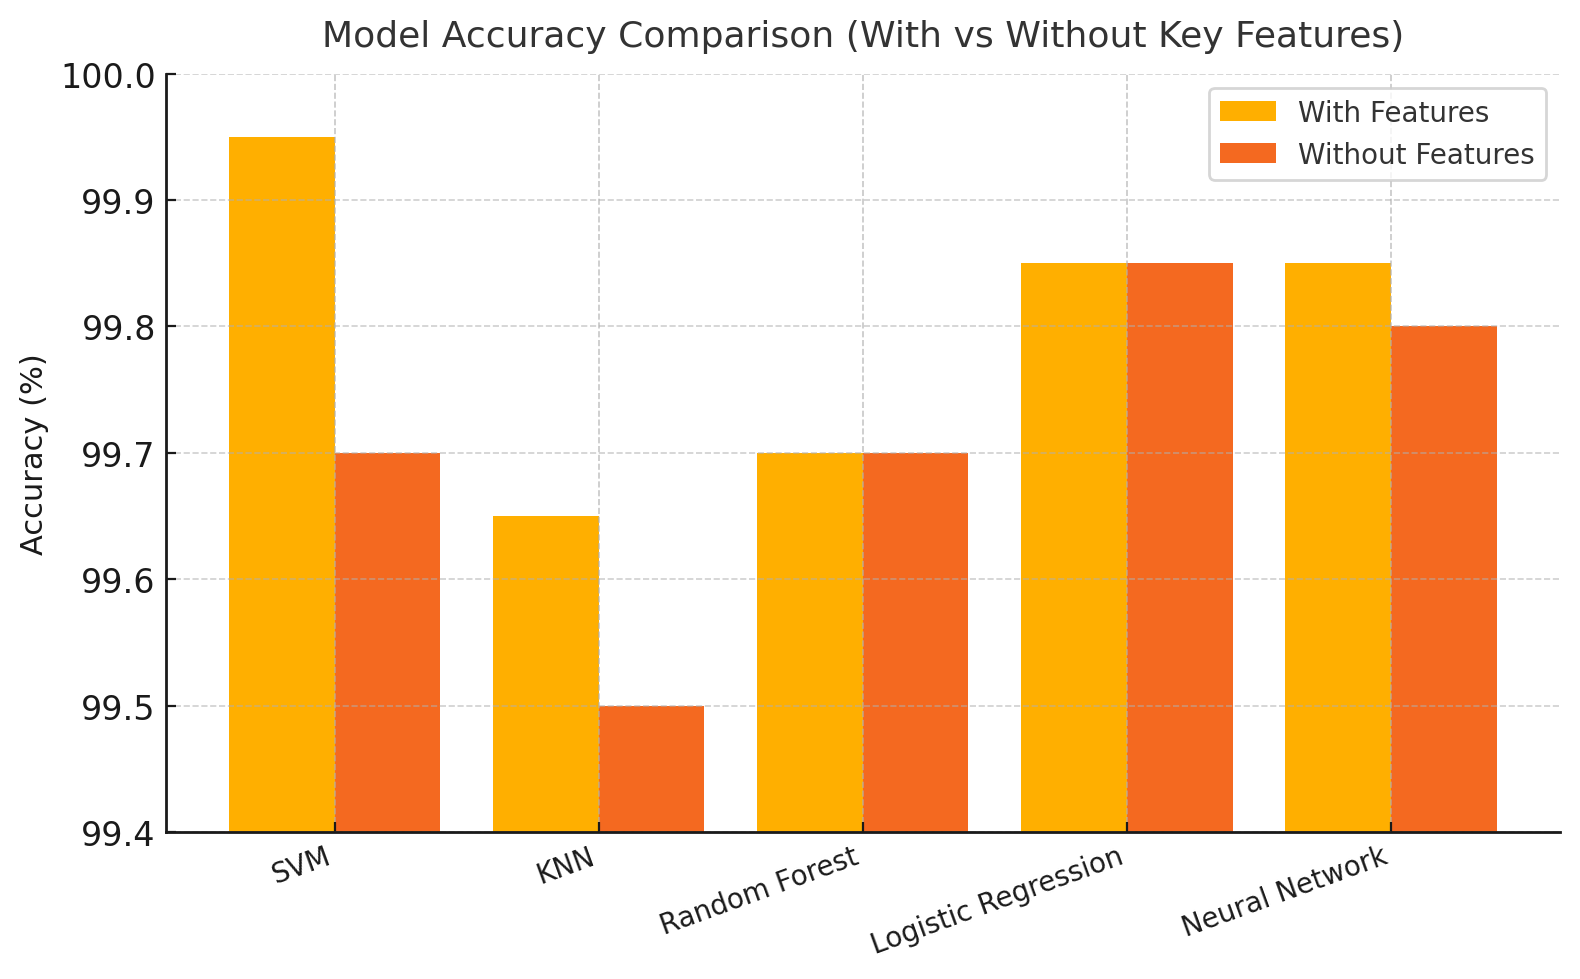